<a href="https://colab.research.google.com/github/yunjinchoidev/ai/blob/main/%5B%E1%84%86%E1%85%AE%E1%86%AB%E1%84%8C%E1%85%A6%5D_LSTM%E1%84%8B%E1%85%B3%E1%86%AF_%E1%84%92%E1%85%AA%E1%86%AF%E1%84%8B%E1%85%AD%E1%86%BC%E1%84%92%E1%85%A2_%E1%84%8C%E1%85%AE%E1%84%80%E1%85%A1_%E1%84%8B%E1%85%A8%E1%84%8E%E1%85%B3%E1%86%A8_%E1%84%86%E1%85%A9%E1%84%83%E1%85%A6%E1%86%AF_%E1%84%80%E1%85%AE%E1%84%92%E1%85%A7%E1%86%AB%E1%84%92%E1%85%A1%E1%84%80%E1%85%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : LSTM을 활용해 주가 예측 모델 구현하기

이번 튜토리얼 에서는 다음과 같은 **프로세스 파이프라인**으로 주가 예측을 진행합니다.

- FinanceDataReader를 활용하여 주가 데이터 받아오기
- TensorFlow Dataset 클래스를 활용하여 주가 데이터 구축
- LSTM 을 활용한 주가 예측 모델 구축

## Step 1. 데이터 불러오기 및 EDA

### 문제 01. 필요한 모듈 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

### 문제 02. FinanceDataReader import

**FinanceDataReader**는 주가 데이터를 편리하게 가져올 수 있는 파이썬 패키지입니다.

- [GitHub Repo](https://github.com/FinanceData/FinanceDataReader)

**FinanceDataReader**가 아직 설치 되지 않으신 분들은 아래의 주석을 해제한 후 명령어로 설치해 주시기 바랍니다.

In [2]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import FinanceDataReader as fdr

### 문제 03. 삼성전자 데이터 불러오기

In [4]:
# fdr 라이브러리를 활용해 삼성전자 주가 데이터를 불러오세요.
# 대상 : 삼성전자(005930) 전체 (1996-11-05 ~ 현재)
samsung = fdr.DataReader('005930')

매우 편리하게 삼성전자 주가 데이터를 `DataFrame`형식으로 받아옵니다.

기본 **오름차순 정렬**이 된 데이터임을 알 수 있습니다.

### 컬럼 설명

- `Open`:   시가
- `High`:   고가
- `Low`:    저가
- `Close`:  종가
- `Volume`: 거래량
- `Change`: 대비

### 문제 04. 삼성전자 데이터 EDA

In [5]:
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-02-10,62600,63000,62400,62800,9382576,-0.003175
2023-02-13,62900,63000,62300,62900,10730362,0.001592
2023-02-14,63600,63900,63200,63200,9126664,0.004769
2023-02-15,63900,63900,62000,62200,13208103,-0.015823
2023-02-16,62500,63700,62400,63700,13718393,0.024116


**미국 주식 데이터**도 가져올 수 있습니다.

### 문제 05. 애플 데이터 불러오기

In [6]:
# fdr 라이브러리를 활용해 Apple(AAPL) 데이터를 불러오세요.
apple = fdr.DataReader('AAPL')

### 문제 06. 애플 데이터 EDA

In [8]:
apple.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57409100
2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600
2023-02-15,153.110001,155.500000,152.880005,155.330002,155.330002,65573800


### 문제 07. 특정 시점(2017년) 이후 데이터 불러오기

In [9]:
# Apple(AAPL), 2017년
apple = fdr.DataReader('AAPL', '2017')

### 문제 08. 날짜를 지정하여 특정 범위(40년간) 데이터 불러오기

In [ ]:
# Ford(F), 1980-01-01 ~ 2019-12-30 (40년 데이터)
ford =

### 문제 09. '금'과 '달러' 데이터도 가져올 수 있습니다. 두 데이터를 불러와 head를 출력해보세요.

*[GitHub 페이지 링크](https://github.com/FinanceData/FinanceDataReader) 참고

In [ ]:
# 금 선물 가격


In [ ]:
# 달러 가격


### 문제 10. 삼성전자 데이터를 STOCK_CODE에 저장하고 인덱스를 확인해보세요

In [10]:
# 문제 03과 코드는 동일합니다.
# 삼성전자 주식코드: 005930
STOCK_CODE = '005930'

In [11]:
# fdr 라이브러리를 활용해 삼성전자 데이터를 불러오세요 
stock = fdr.DataReader(STOCK_CODE)

In [12]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-11-06,1132,1262,1130,1149,1574840,NaN
1998-11-07,1147,1187,1134,1161,352070,0.010444
1998-11-09,1156,1197,1139,1197,700710,0.031008
1998-11-10,1187,1187,1135,1136,1026580,-0.050961
1998-11-11,1120,1149,1109,1128,721810,-0.007042


In [13]:
stock.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-02-10,62600,63000,62400,62800,9382576,-0.003175
2023-02-13,62900,63000,62300,62900,10730362,0.001592
2023-02-14,63600,63900,63200,63200,9126664,0.004769
2023-02-15,63900,63900,62000,62200,13208103,-0.015823
2023-02-16,62500,63700,62400,63700,13718393,0.024116


In [15]:
# 인덱스를 확인해보세요.
stock.index

DatetimeIndex(['1998-11-06', '1998-11-07', '1998-11-09', '1998-11-10',
               '1998-11-11', '1998-11-12', '1998-11-13', '1998-11-14',
               '1998-11-16', '1998-11-17',
               ...
               '2023-02-03', '2023-02-06', '2023-02-07', '2023-02-08',
               '2023-02-09', '2023-02-10', '2023-02-13', '2023-02-14',
               '2023-02-15', '2023-02-16'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

## Step 2. 시계열 데이터 시각화


### 문제 11. 인덱스가 `DatetimeIndex`로 정의되어 있다면, 연도, 월, 일을 쪼갤 수 있습니다. 데이터를 분리해주세요.

In [16]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

In [17]:
stock.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
1998-11-06,1132,1262,1130,1149,1574840,NaN,1998,11,6
1998-11-07,1147,1187,1134,1161,352070,0.010444,1998,11,7
1998-11-09,1156,1197,1139,1197,700710,0.031008,1998,11,9
1998-11-10,1187,1187,1135,1136,1026580,-0.050961,1998,11,10
1998-11-11,1120,1149,1109,1128,721810,-0.007042,1998,11,11


### 문제 12. 연도별, 월별 피봇테이블을 각각 구현해보세요.

In [21]:
stock.groupby(['Year','Month']).mean()

Open          High           Low         Close  \
Year Month                                                           
1998 11      1254.952381   1285.904762   1229.571429   1257.904762   
     12      1409.100000   1462.550000   1366.300000   1418.050000   
1999 1       1753.800000   1783.400000   1700.650000   1740.000000   
     2       1676.823529   1704.529412   1645.117647   1680.294118   
     3       1756.545455   1795.863636   1731.272727   1759.954545   
...                  ...           ...           ...           ...   
2022 10     56563.157895  57384.210526  56026.315789  56710.526316   
     11     61009.090909  61463.636364  60463.636364  61090.909091   
     12     59219.047619  59657.142857  58723.809524  59080.952381   
2023 1      60575.000000  61140.000000  59900.000000  60540.000000   
     2      62975.000000  63350.000000  62233.333333  62791.666667   

                  Volume    Change        Day  
Year Month                                     
1998 11     7.751171e+05  0.005673  17.904762  
     12     9.081414e+05  0.011062  12.900000  
1999 1      6.404312e+05  0.007332  16.500000  
     2      4.249165e+05 -0.002100  13.058824  
     3      5.376838e+05  0.004718  16.318182  
...                  ...       ...        ...  
2022 10     1.718619e+07  0.006090  17.263158  
     11     1.321282e+07  0.002220  15.318182  
     12     1.116872e+07 -0.005477  15.380952  
2023 1      1.523607e+07  0.005056  15.200000  
     2      1.397043e+07  0.003751   8.666667  

[292 rows x 7 columns]

### 문제 13. matplotlib을 활용해 시간에 따른 주식 가격 시계열 그래프를 그려보세요.

Text(0, 0.5, 'price')

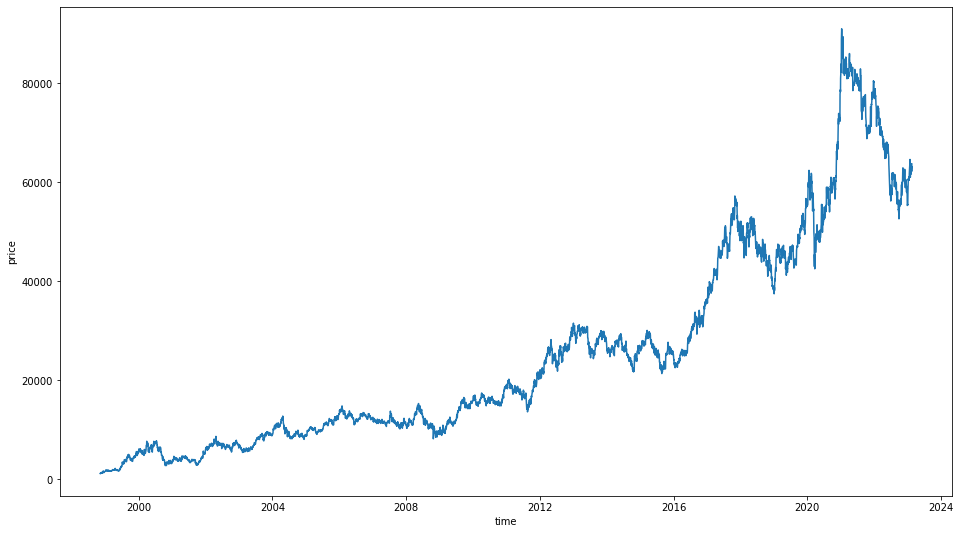

In [22]:
plt.figure(figsize=(16, 9))
# 코드를 이어서 작성해주세요.
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

### 문제 14. subplots를 활용해 그래프 4개(2,2)를 동시에 그려보세요.

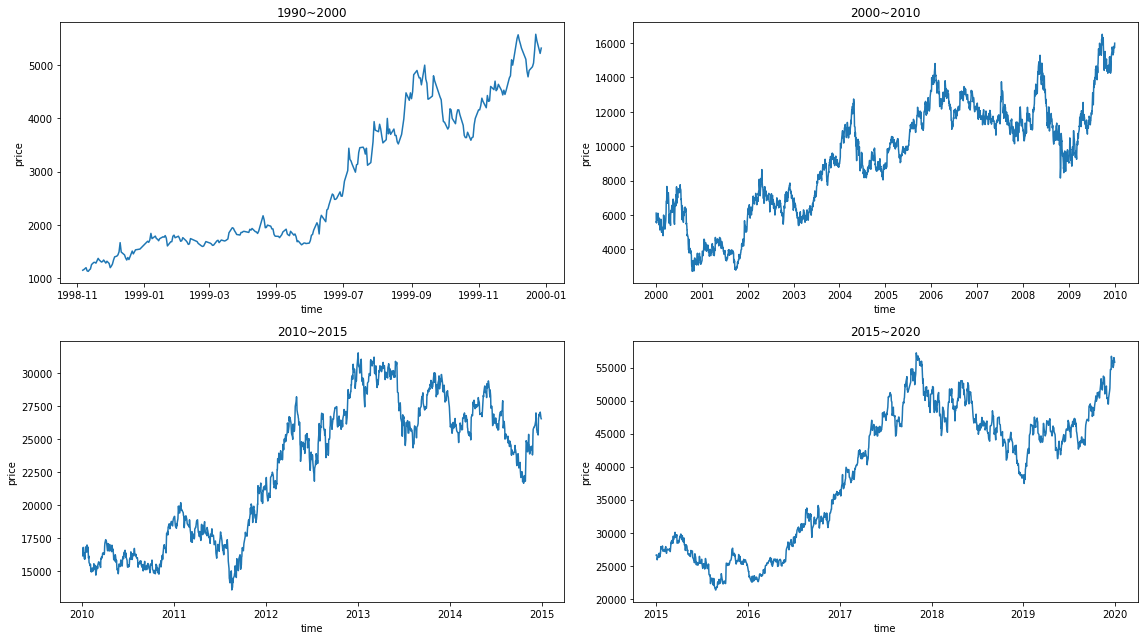

In [24]:
# 1990~2000, 2000~2010, 2010~2015, 2015~2020
time_steps = [
['1990','2000'],
['2000','2010'],
['2010','2015'],
['2015','2020']
]

fig, axes = plt.subplots(2,2)
fig.set_size_inches(16, 9)

for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')

plt.tight_layout()
plt.show()


## Step 3. 시계열 데이터의 전처리

### 문제 15. MinMaxScaler를 활요해 데이터 전처리를 수행합니다.

주가 데이터에 대하여 딥러닝 모델이 더 잘 학습할 수 있도록 **정규화(Normalization)**를 해주도록 하겠습니다.

**표준화 (Standardization)**와 **정규화(Normalization)**에 대한 내용은 아래 링크에서 더 자세히 다루니, 참고해 보시기 바랍니다.

- [데이터 전처리에 관하여](https://teddylee777.github.io/scikit-learn/scikit-learn-preprocessing)

In [30]:
stock[scale_cols]

,Open,High,Low,Close,Volume
Date,,,,,
1998-11-06,1132,1262,1130,1149,1574840
1998-11-07,1147,1187,1134,1161,352070
1998-11-09,1156,1197,1139,1197,700710
1998-11-10,1187,1187,1135,1136,1026580
1998-11-11,1120,1149,1109,1128,721810
...,...,...,...,...,...
2023-02-10,62600,63000,62400,62800,9382576
2023-02-13,62900,63000,62300,62900,10730362
2023-02-14,63600,63900,63200,63200,9126664


In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
# 스케일 후 columns
scaled = scaler.fit_transform(stock[scale_cols])
scaled 

array([[1.25359911e-02, 1.30371901e-02, 1.26256983e-02, 2.33665658e-04,
        1.74388957e-02],
       [1.27021041e-02, 1.22623967e-02, 1.26703911e-02, 3.67188891e-04,
        3.89862589e-03],
       [1.28017719e-02, 1.23657025e-02, 1.27262570e-02, 7.67758590e-04,
        7.75926989e-03],
       ...,
       [7.04318937e-01, 6.60123967e-01, 7.06145251e-01, 6.90671177e-01,
        1.01063563e-01],
       [7.07641196e-01, 6.60123967e-01, 6.92737430e-01, 6.79544241e-01,
        1.46259131e-01],
       [6.92137320e-01, 6.58057851e-01, 6.97206704e-01, 6.96234645e-01,
        1.51909797e-01]])

스케일이 완료된 column으로 새로운 데이터프레임을 생성합니다.

**시간 순으로 정렬**되어 있으며, datetime index는 제외했습니다.

*6,000개의 row, 5개 column*으로 이루어진 데이터셋이 DataFrame으로 정리되었습니다.

In [31]:
# 아래 코드는 그대로 실행해주세요.
df = pd.DataFrame(scaled, columns=scale_cols)

### 문제 16. 모델 학습을 위해 train 데이터와 test 데이터로 분할해주세요.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# Close 컬럼이 예측할 데이터입니다.
# test_size는 0.2, random_state는 0으로 지정해주세요.
# shuffle을 수행하지 않습니다.
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

### 문제 17. train 데이터와 test 데이터의 shape을 각각 살펴봅니다.

In [34]:
x_train.shape, y_train.shape

((4800, 4), (4800,))

In [36]:
x_test.shape, y_test.shape

((1200, 4), (1200,))

### 문제 18. TensroFlow Dataset을 활용해 시퀀스 데이터셋을 함수로 구현해주세요

In [ ]:
import tensorflow as tf

In [ ]:
def windowed_dataset():
    series = tf.expand_dims
    ds = 
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(#코드 작성)
    return ds.batch(batch_size).prefetch(1)

## Step 4. 모델 구현하기

### 문제 19. Hyperparameter를 정의하고 데이터에 적용해주세요.

In [ ]:
# 아래 코드는 그대로 실행해주세요.
WINDOW_SIZE=20
BATCH_SIZE=32

In [ ]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
# WINDOW_SIZE와 BATCH_SIZE를 각 데이터셋에 적용해주세요.
train_data = windowed_dataset(#코드 작성
test_data = windowed_dataset(#코드 작성

In [ ]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다. 그대로 실행해보고, 데이터의 shape을 살펴보세요.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


### 문제 20. Sequential 모델을 구현합니다. 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성합니다. filters는 32로, kernel_size는 5로 지정해주세요.
    

    # LSTM과 Dense 레이어를 사용해주세요. 필요한 경우 활성함수는 relu로 지정합니다.
    
])

### 문제 21. 모델을 Compile합니다. loss는 Huber 함수를 사용하고 optimizer는 Adam을 사용해주세요.

In [ ]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = 

model.compile()

In [ ]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = 
# val_loss 기준 체크포인터도 생성합니다.
filename = 
checkpoint = ModelCheckpoint()

In [ ]:
# callbacks로 앞에서 구현한 earlystopping과 checkpoint를 지정해주세요.
history =

## Step 5. 모델을 활용한 예측 및 결과 시각화

### 문제 24. 저장한 ModelCheckpoint 를 불러옵니다.

### 문제 25. `test_data`를 활용하여 예측을 수행합니다.

In [ ]:
pred =

### 문제 26. matplotlib을 활용해 예측 데이터를 시각화해주세요.

아래 시각화 코드중 y_test 데이터에 **[20:]**으로 슬라이싱을 한 이유는

예측 데이터에서 20일치의 데이터로 21일치를 예측해야하기 때문에 test_data로 예측 시 *앞의 20일은 예측하지 않습니다.*

따라서, 20번 째 index와 비교하면 더욱 정확합니다.

In [ ]:
# 20일치의 데이터로 21일치를 예측하므로 test_data 사용시 이전 20일은 예측하지 않습니다.
# 따라서 y_test 데이터에 [20:]로 슬라이싱해주세요.
plt.figure(figsize=(12, 9))


plt.legend()
plt.show()